# Graph Neural Networks and Fake News Detection
### Final Project for CSCI 381
### Bless Bah Awazi, Kit Conklin, Munguldei Batsaikhan

Sitting alone in the dark contemplating about the meaning of life, you suddenly realize that zebras don't have hands. Then, whose hands were those in the seemingly peaceful message? Surely, they didn't take a human hostage to Zearth?

Your suspicions are confirmed when you recreate the received image and pass it into a more advanced Zebrese interpreter one of your UNCOOL colleagues had built. Turns out, in Zebrese, a heart is a signal for "INVASION"!

Just then, the hip young intern your co-worker recently recruited to the team waltzes in wearing zebra-print pants.

<img src="img/z_intern.jpeg"/>

You admire/question their bold fashion choice and head out for a much needed break. Outside, you witness a horrible sight:

<img src="img/z_print2.jpeg"/>

Zebra prints everywhere! You have two horrible realizations: 
1. The model you built for distinguishing zebras is now near useless.
2. Zebra prints are back in style. (Or, were they ever in style?)

You run back into the office, grab the intern and press him as to where he got the idea to get such pants. He points to the latest volume of Zoomer Vogue — "Zoomer Vogue interviewed Anna Wintour, and she said that zebra prints are the newest drip!"

You check the article, and it's clear that Zoomer Vogue is not a trustworthy source. A recent study you were reading on identifying fake news using Graph Neural Networks (GNNs) comes to your mind. You are ready to start building a GNN to detect fake zebra news with your UNCOOL colleagues, however, everyone is out of the office since the wrongly-interpreted peace reply was received.

Now, it's only you and the intern. You ask him:

"Have you heard about Graph Neural Networks?" <br>
"No. What is that?" <br>
"It's a type of neural network-" <br>
"Actually, before you explain any further, why should I care?"

It's going to be another long day.


## Getting Started

"<b>GNNs are neural networks that operate on graph data. And graphs are all around us since the world defines objects in relation to other objects! Think of how many systems you will be able to model with GNNs then! Currently, practical applications are seen in areas such as social networks, antibacterial discovery, cyber security, fake news detection, traffic prediction and recommendation systems</b>," you enthusiastically explain to the intern.

The intern winces at the mention of a graph. So, you think a recap on graphs is in order.

## Recap on Graphs

<b>What is a graph?</b>

A graph is a data structure consisting of nodes and edges. The nodes store information about individual data points, such as news articles or zebras, allowing us to visualize each element in a dataset. The edges are lines drawn between a pair of nodes, connecting them and allowing us to visualize how individual data points interact with each other and the patterns by which they are interlinked. 

<b>How to use graphs to make predictions?</b>

There are levels to which graph data can be used to predict information about a given problem:

- <b>Graph-level tasks</b> involve analyzing the entire graph as input, assigning it a classification or label based on its overall shape and general characteristics. Then, we can make subsequent predictions about a specific property of the dataset based on the graph's properties. One example of a graph-level task is image classification: image data can be converted into a graph, which can be analyzed and labeled based on certain characteristics, allowing us to predict the contents of the image (i.e: whether or not it depicts a zebra) based on the graph’s classification (i.e: zebra or non-zebra). 

<img src="img/graphlevel.png" width="500">

- <b>Node-level tasks</b> involve analyzing the nodes of a graph to predict the characteristics of individual data points and classify data points into groups based on predicted characteristics. An example of a node-level task may include a social network graph, where nodes represent individuals and edges represent relationships. A node-level task would be identifying social circles and classifying individuals based which circle they belong to
predicting relationships between individuals in a social network graph, where nodes represent individuals and edges represent relationships. 

<img src="img/nodelevel.png" width="500">

- <b>Edge-level tasks</b> involve analyzing the edges of a graph to predict how the nodes of a graph are connected. In the social network graph example, an edge-level task would be to predict relationships between individuals, identifying the likelihood that two individuals (nodes) would be related to each other (connected by an edge).

<img src="img/edgelevel.png" width="500">


## Graphs as Matrices

We now know that graphs can be very useful when working with unstructured data like social networks, and although we are very eager to make use of these to stop our zebra stripped foes we don't yet know how do to go about solving graph tasks with neural networks. The first step is to think about how we will represent graphs to be compatible with neural networks. 

<img src="img/Graph.png" width="800">

Machine learning models typically take rectangular or grid-like arrays as input. So, it’s not immediately intuitive how to represent them in a format that is compatible with deep learning. However, representing a graph’s connectivity is more complicated. Perhaps the most obvious choice would be to use an adjacency matrix, since this is easily tensorisable. However, this representation has a few drawbacks. The first problem is that there are many adjacency matrices that can encode the same connectivity, and there is no guarantee that these different matrices would produce the same result in a deep neural network (that is to say, they are not permutation invariant). Three different adjacency matrix for the graph above are shown below.

<img src="img/adj1.png" width="300">
<img src="img/adj2.png" width="300">
<img src="img/adj3.png" width="300">

Another factor is that in real life graphs the number of nodes in a graph can be on the order of millions, and the number of edges per node can be highly variable. Often, this leads to very sparse adjacency matrices, which are space-inefficient.


One elegant and memory-efficient way of representing sparse matrices is as adjacency lists. These describe the connectivity of edge $e_{k}$ between nodes $n_{i}$ and $n_{j}$ as a tuple (i,j) in the k-th entry of an adjacency list. Since we expect the number of edges to be much lower than the number of entries for an adjacency matrix ($n^{2}$ nodes), we avoid computation and storage on the disconnected parts of the graph.

<img src="img/img3.jpg" width="500">

We can then store the information in a nodes tensor and a connectivity tensor as shown below. 

Nodes tensor: `[1, 2, 3, 4, 5, 6, 7, 8]`
Connectivity tensor: `[[2, 1], [3, 1], [5, 4], [7, 3], [8, 4], [8, 5], [8, 6]]`

## The Simple GNN

Now that our input is permutation invariant, we can start using GNNs to solve graph prediction tasks.

We may think of <b>GNNs as a function that acts on all attributes of the graph (nodes, edges, global-context) such that it preserves graph symmetries (permutation invariances)</b>. So, the input of a GNN is a graph with information loaded into its nodes, edges and global-context; and the output is a graph with these transformed embeddings that retains the original connectivity structure. We may visualize a single layer of GNN as following:


<img src="img/simple_layer.png" width="800">

### Pooling in GNNs

Since we would like our model to be able to differentiate fake news (`"False"`) from real (`"True"`), let's focus on logistic regression to exploring pooling in GNNs.

- <b>Prediction using self-information</b>: Given a graph that already contains information on nodes, edges and global context, we just apply a linear classifier (think `softmax`) to make a binary prediction on the respective element.
  
- <b>Prediction using others' information</b>: For example, what if we would like to make predictions on nodes, but the input graph only contains information in edges and not in nodes? In such cases, we need a way to collect information from the edges and give it to the nodes. We can do this by <b>pooling</b>, which proceeds in the following two steps for GNNs:
  
    1. For each element to be pooled, collect each of their embeddings and add them into a matrix.
    2. The collected embeddings are then combined, usually via the sum operation.

<img src="img/pooling.png" width="300" style="display=block; margin:auto"/>

Note that pooling can be performed not only from edges to nodes, but also to global embdeddings and vice versa. (Think submarines in CNNs!) Putting everything together, our simplified GNN network looks like this:

<img src="img/simple_GNN.png" width="800" style="display=block; margin:auto"/>

<b>Remember</b> we don't use the connectivity of the graph at all inside the GNN layer. Each node is processed independently, as is each edge, as well as the global context. We only use connectivity when pooling information for prediction.

## Solving Problems with GNN

We will demonstrate an example of a use of GNNs: detecting fake news from social media propagation. We will use the PyG (Pytorch Geometric) library, which contains a variety of methods for geometric deep learning (deep learning on graphs).

This model was implemention comes from the paper User Preference-aware Fake News Detection by Yingtong Dou, Kai Shu, Congying Xia, Philip S. Yu, and Lichao Sun.

In [1]:
import torch
import torch_geometric

We begin by loading in our data, which consists of news article content and user engagement information extracted from Twitter.

In [ ]:
from torch_geometric.datasets import UPFD
train_data = UPFD(root=".", name="gossipcop", feature="content", split="train")
test_data = UPFD(root=".", name="gossipcop", feature="content", split="test")
print("Train Samples: ", len(train_data))
print("Test Samples: ", len(test_data))

We can investigate edges in the dataset, where the nodes represent users, and the edges represent subsequent retweets after a user posts or shares an article. The graph's edges are stored in a 3D matrix, with edges drawn from the ith element in the first tensor to the ith element in the second tensor.

A set of "root nodes" represents the users who initially post a headline or news article. These root nodes are connected to users who retweeted the headline directly from their post, and subsequent edges are drawn from users who retweeted the headline from this first set of retweets. When we print the edge indices, element 0 represents the root node, and elements 1 through 24 represent users who retweeted the headline from the original source. Elements 25 and 26 are users who retweeted the headline from the user represented by element 15, and so forth. 

In [3]:
sample_id=1
train_data[sample_id].edge_index

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  15,  17,  17,
          22,  22,  22,  22,  23,  26,  26,  26,  26,  26,  26,  26,  26,  27,
          27,  27,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,
          28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,  28,
          28,  28,  28,  28,  28,  28,  28,  28,  30,  34,  34,  38,  38,  38,
          38,  39,  40,  57,  59,  65,  65,  65,  66,  68,  69,  77,  77,  79,
          79,  80,  83,  83,  83,  83,  84, 101, 110, 115, 116, 117],
        [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
          29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  43,  44,
          45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  5

We can visualize this propagation network using the networkx package. We can see how headlines propigate from the original poster (root nodes), and from other users who retweet the article.

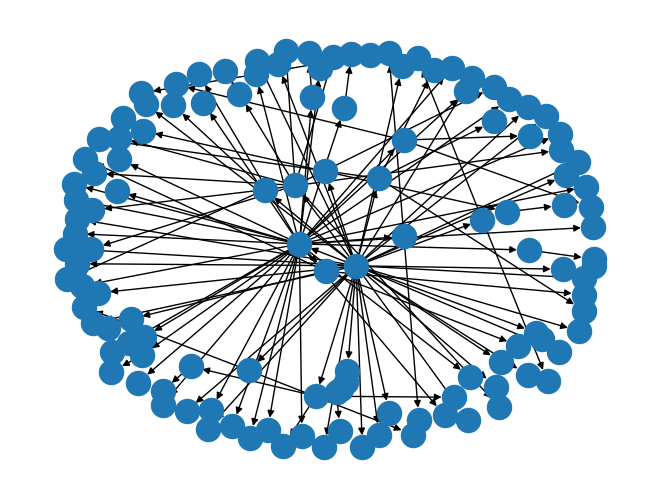

In [5]:
import networkx as nx

# From PyG utils
def to_networkx(data, node_attrs=None, edge_attrs=None, to_undirected=False,
                remove_self_loops=False):
    if to_undirected:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
    G.add_nodes_from(range(data.num_nodes))
    node_attrs, edge_attrs = node_attrs or [], edge_attrs or []
    values = {}
    for key, item in data(*(node_attrs + edge_attrs)):
        if torch.is_tensor(item):
            values[key] = item.squeeze().tolist()
        else:
            values[key] = item
        if isinstance(values[key], (list, tuple)) and len(values[key]) == 1:
            values[key] = item[0]
    for i, (u, v) in enumerate(data.edge_index.t().tolist()):
        if to_undirected and v > u:
            continue
        if remove_self_loops and u == v:
            continue
        G.add_edge(u, v)
        for key in edge_attrs:
            G[u][v][key] = values[key][i]
    for key in node_attrs:
        for i, feat_dict in G.nodes(data=True):
            feat_dict.update({key: values[key][i]})
    return G

nx.draw(to_networkx(train_data[sample_id]))

We can examine the features of the nodes in detail by examining its shape. In this graph, we have 125 nodes, which are stored in vector of length 310. Each node vector is embedded with information about the content of the news article being shared by the user, as well as information on the user's post and retweet history.

In [6]:
print(train_data[sample_id].x.shape)
train_data[sample_id].x

torch.Size([125, 310])


tensor([[0.5220, 0.5120, 0.4817,  ..., 0.6874, 0.1023, 0.1529],
        [0.4610, 0.4544, 0.6279,  ..., 0.2055, 0.1667, 0.2500],
        [0.4461, 0.4728, 0.4978,  ..., 0.8356, 0.0556, 0.0000],
        ...,
        [0.5574, 0.4934, 0.5588,  ..., 0.3562, 0.0556, 0.2647],
        [0.5274, 0.5889, 0.4425,  ..., 0.9589, 0.1111, 0.1176],
        [0.5220, 0.5120, 0.4817,  ..., 0.6874, 0.1023, 0.1529]])

We can also examine the distribution of the news articles included in the data: we see that there is an even distribution between real and fake news headlines.

/var/folders/cn/rwwmh2lx3w59ls3x13m06p4c0000gn/T/ipykernel_43323/3011074887.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<Axes: >

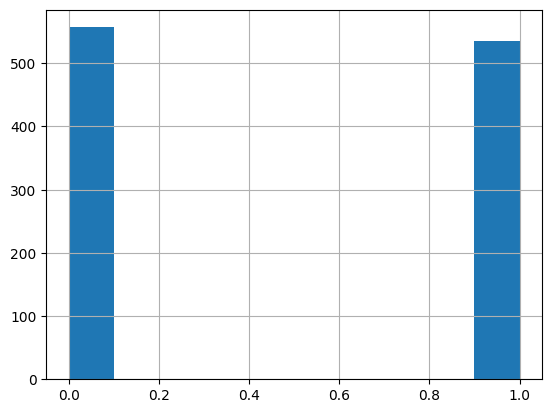

In [7]:
import pandas as pd
labels = [data.y.item() for i, data in enumerate(train_data)]
df = pd.DataFrame(labels, columns=["Labels"])
df["Labels"].hist()

Now, we can begin the training process. We start by loading the train and test data into DataLoaders from PyTorch Geometric, which merges the data into a mini-batch.

In [10]:
from torch_geometric.loader import DataLoader
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

Now, we build our model. 

We have three graph attention layers, and apply linear transformations that use final embeddings  to output a single value, out_channels.

In the forward pass, we pass the graph x and the adjacency information edge_index through three GNN layers, providing us with final embeddings in the last layer, which we then pool the node information from. 

We concantinate the final pooled embeddings with the raw language embeddings (article content and user history data). We extract the news nodes (the root nodes), and index the raw features with the root node indices, and pass the news nodes through a linear transformation.

The global embeddings are combined with the article content and user history embeddings, and passed through another linear transformation to extract the final output, which we pass through a sigmoid layer in order to obtain a value between zero and one. 

In [11]:
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import GATConv
from torch.nn import Linear


class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        
        # Three graph attention layers
        self.conv1 = GATConv(in_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, hidden_channels)
        self.conv3 = GATConv(hidden_channels, hidden_channels)

        # Readout
        self.lin_news = Linear(in_channels, hidden_channels)
        self.lin0 = Linear(hidden_channels, hidden_channels)
        self.lin1 = Linear(2*hidden_channels, out_channels)

    def forward(self, x, edge_index, batch):
        # Graph Convolutions
        h = self.conv1(x, edge_index).relu()
        h = self.conv2(h, edge_index).relu()
        h = self.conv3(h, edge_index).relu()

        # Pooling
        h = gmp(h, batch)

        # Readout
        h = self.lin0(h).relu()

        # According to UPFD paper: Include raw word2vec embeddings of news 
        # This is done per graph in the batch
        root = (batch[1:] - batch[:-1]).nonzero(as_tuple=False).view(-1)
        root = torch.cat([root.new_zeros(1), root + 1], dim=0)
        # root is e.g. [   0,   14,   94,  171,  230,  302, ... ]
        news = x[root]
        news = self.lin_news(news).relu()
        
        out = self.lin1(torch.cat([h, news], dim=-1))
        return torch.sigmoid(out)

GNN(train_data.num_features, 128, 1)

GNN(
  (conv1): GATConv(310, 128, heads=1)
  (conv2): GATConv(128, 128, heads=1)
  (conv3): GATConv(128, 128, heads=1)
  (lin_news): Linear(in_features=310, out_features=128, bias=True)
  (lin0): Linear(in_features=128, out_features=128, bias=True)
  (lin1): Linear(in_features=256, out_features=1, bias=True)
)

Now it's time to train the model. 

We create a train function, which calculates the loss, along with a test function, which calculates the loss, accuracy, and f1 score.

In [12]:
from sklearn.metrics import accuracy_score, f1_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNN(train_data.num_features, 128, 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
loss_fnc = torch.nn.BCELoss()

def train(epoch):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = loss_fnc(torch.reshape(out, (-1,)), data.y.float())
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
    return total_loss / len(train_loader.dataset)
@torch.no_grad()
def test(epoch):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    for data in test_loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.batch)
        loss = loss_fnc(torch.reshape(out, (-1,)), data.y.float())
        total_loss += float(loss) * data.num_graphs
        all_preds.append(torch.reshape(out, (-1,)))
        all_labels.append(data.y.float())

    # Calculate Metrics
    accuracy, f1 = metrics(all_preds, all_labels)

    return total_loss / len(test_loader.dataset), accuracy, f1


def metrics(preds, gts):
    preds = torch.round(torch.cat(preds))
    gts = torch.cat(gts)
    acc = accuracy_score(preds, gts)
    f1 = f1_score(preds, gts)
    return acc, f1

We begin training:

In [13]:
for epoch in range(40):
    train_loss = train(epoch)
    test_loss, test_acc, test_f1 = test(epoch)
    print(f'Epoch: {epoch:02d} |  TrainLoss: {train_loss:.2f} | '
          f'TestLoss: {test_loss:.2f} | TestAcc: {test_acc:.2f} | TestF1: {test_f1:.2f}')

Epoch: 00 |  TrainLoss: 0.80 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 01 |  TrainLoss: 0.69 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 02 |  TrainLoss: 0.70 | TestLoss: 0.69 | TestAcc: 0.78 | TestF1: 0.72
Epoch: 03 |  TrainLoss: 0.69 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 04 |  TrainLoss: 0.69 | TestLoss: 0.68 | TestAcc: 0.83 | TestF1: 0.80
Epoch: 05 |  TrainLoss: 0.69 | TestLoss: 0.74 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 06 |  TrainLoss: 0.71 | TestLoss: 0.72 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 07 |  TrainLoss: 0.70 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 08 |  TrainLoss: 0.69 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 09 |  TrainLoss: 0.69 | TestLoss: 0.72 | TestAcc: 0.50 | TestF1: 0.00
Epoch: 10 |  TrainLoss: 0.69 | TestLoss: 0.67 | TestAcc: 0.87 | TestF1: 0.89
Epoch: 11 |  TrainLoss: 0.67 | TestLoss: 0.68 | TestAcc: 0.50 | TestF1: 0.67
Epoch: 12 |  TrainLoss: 0.67 | TestLoss: 0.69 | TestAcc: 0.50 | TestF1: 0.00

Sample predictions:

In [ ]:
for data in test_loader:
    data = data.to(device)
    pred = model(data.x, data.edge_index, data.batch)
    df = pd.DataFrame()
    df["pred_logit"] = pred.detach().numpy()[:,0]
    df["pred"] = torch.round(pred).detach().numpy()[:,0]
    df["true"] = data.y.numpy()
    print(df.head(10))
    break

## Conclusion

You pass the pervasive article claiming zebra prints are back in style into the GNN model. 

Turns out, it's fake news. Anna Wintour confirms she never said zebra prints were back (or, if they were ever in). You entrust the intern to educate the general public on explaining the model to detect fake news. 

After a few days, zebra prints are no longer to be found on the streets. Now, we can go back to successfully detecting zebras with our initial model and prepare for WAR.

## Bibliography

Dou, Yingtong, Kai Shu, Congying Xia, Philip S. Yu, and Lichao Sun. “User Preference-Aware Fake News Detection.” In Proceedings of the 44th International ACM SIGIR Conference on Research and Development in Information Retrieval, 2051–55. Virtual Event Canada: ACM, 2021. https://doi.org/10.1145/3404835.3462990.

Ermurachi, Vlad, and Daniela Gifu. “UAIC1860 at SemEval-2020 Task 11: Detection of Propaganda Techniques in News Articles.” In Proceedings of the Fourteenth Workshop on Semantic Evaluation, 1835–40. Barcelona (online): International Committee for Computational Linguistics, 2020. https://doi.org/10.18653/v1/2020.semeval-1.241.

Khemani, Bharti, Shruti Patil, Ketan Kotecha, and Sudeep Tanwar. “A Review of Graph Neural Networks: Concepts, Architectures, Techniques, Challenges, Datasets, Applications, and Future Directions.” Journal of Big Data 11, no. 1 (January 16, 2024): 18. https://doi.org/10.1186/s40537-023-00876-4.

Monti, Federico, Fabrizio Frasca, Davide Eynard, Damon Mannion, and Michael Bronstein. “Fake News Detection on Social Media Using Geometric Deep Learning,” 2019.

Sanchez-Lengeling, Benjamin, Emily Reif, Adam Pearce, and Alexander B. Wiltschko. “A Gentle Introduction to Graph Neural Networks.” Distill 6, no. 9 (September 2, 2021): e33. https://doi.org/10.23915/distill.00033.

Zhao, Zilong, Jichang Zhao, Yukie Sano, Orr Levy, Hideki Takayasu, Misako Takayasu, Daqing Li, Junjie Wu, and Shlomo Havlin. “Fake News Propagates Differently from Real News Even at Early Stages of Spreading.” EPJ Data Science 9, no. 1 (December 2020): 1–14. https://doi.org/10.1140/epjds/s13688-020-00224-z.